In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
import Tr_centrality_measure
import Graph_Entropy_measure
import Selection_Algorithm
import Constraint_Coefficient

In [4]:
G = nx.karate_club_graph()
#fh=open("DataSet/bio-diseasome.txt", 'rb')
#G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
#fh.close()
H = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None) 

In [5]:
from itertools import combinations
def nodes_in_triangle(H, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(H.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if H.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes
#equetion 1:selection constrain
def selection_constrain_of(i):
     # degree of N_i:
        N_i = subgraph_of(i).number_of_nodes()
        # sum(sdeg_j):
        sum_sdeg_j = subgraph_of(i).number_of_edges()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        if NT_i > 1:
        #equetion 1:selection constrain        
            TR_i = (N_i-(sum_sdeg_j/2))            
        return  TR_i
    
#Selection Algorithm
def Selection_Algorithm():
    # main part of AL loop
    i=0
    valid_set = []
    for i in H.nodes: 
        subgraph = subgraph_of(i)
        # degree of Ni:
        N_i = subgraph.number_of_nodes()
        # number of triangles: nodes
        NT_i = nx.triangles(H,i)
        # Extract the nodes of interest: nodes
        nodes = [n for n, d in subgraph.nodes(data=True)]
        # Create the set of nodes: nodeset
        nodeset = set(nodes)
        #equetion 1:selection constrain
        if NT_i > 1:
            TR_i = selection_constrain_of(i)
            i+=1        
            list1 = i, NT_i     
            valid_set.append(list1)
                
    return  valid_set


# In[ ]:
def sel_subgraphs():
    sel_subgraphs = []
    for i in H:
        sel_subgraph = H.subgraph(nodes_in_triangle(H, i))
        NT_i = nx.triangles(H,i)
        if NT_i > 1:            
            row = i        
            sel_subgraphs.append(row)
    return  sel_subgraphs

# In[ ]:
#return subgraphs
def subgraph_of(i):
    subgraph = H.subgraph(nodes_in_triangle(H, i))
    return  subgraph

In [13]:
# G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
I = H.copy()
J = H.copy()
ebunch =list(subgraph_of(33).edges)
I.remove_edges_from(ebunch)

In [14]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
#nx.draw(I, with_labels = True)
plt.show()
#plt.savefig("out.png")

<Figure size 432x288 with 0 Axes>

In [15]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
#nx.draw(subgraph_of(107), with_labels = True)
plt.show()
#plt.savefig("out.png")

<Figure size 432x288 with 0 Axes>

In [16]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
#nx.draw(subgraph_of(23), with_labels = True)
plt.show()
#plt.savefig("out.png")

<Figure size 432x288 with 0 Axes>

E:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


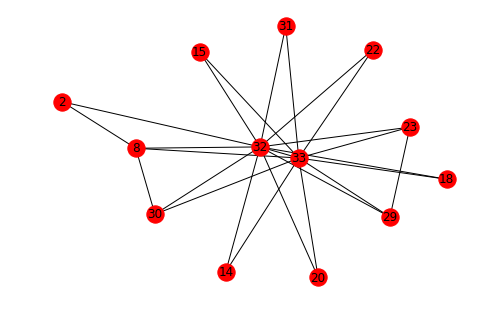

In [18]:
plt.clf()
#H = G.remove_node(0)
#G.remove_edge(Selection_Algorithm.subgraph_of(33).edges())
nx.draw(subgraph_of(32), with_labels = True)
plt.show()
#plt.savefig("out.png")

In [ ]:
def eff():
    i=0
    eff_list=[]
    nodes =  H.nodes
    if nodes!= 0:
        
        #H = nx.karate_club_graph()
        for i in H:  
            H1 = H.copy()
            #ebunch =list(subgraph_of(i).nodes)
            #H1.remove_nodes_from(ebunch)
            H1.remove_node(i)
            efficiency = nx.global_efficiency(H1)
            density = nx.density(H1)
            EF = (i, efficiency, density)       
            eff_list.append(EF)
            
    return  eff_list

In [21]:
H.degree(32)

12